In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 

In [182]:
dados = pd.read_csv('dadosacoes.csv')

In [183]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [184]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [185]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [186]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Text(0.5, 0, 'nome ação')

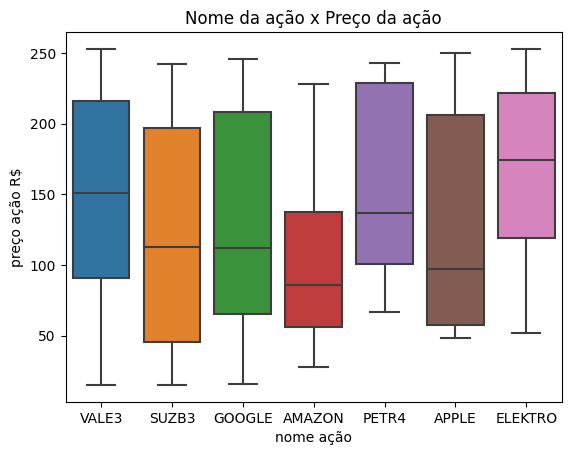

In [187]:
sns.boxplot(x=dados['nome ação'], y = dados['preço ação R$'])
plt.title('Nome da ação x Preço da ação')
plt.ylabel('preço ação R$')
plt.xlabel('nome ação')

Text(0.5, 0, 'nome ação')

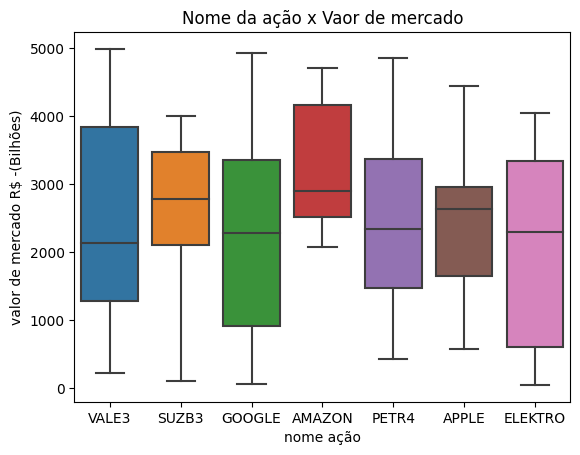

In [188]:
sns.boxplot(x=dados['nome ação'], y = dados['valor de mercado R$ -(Bilhões)'])
plt.title('Nome da ação x Vaor de mercado')
plt.ylabel('valor de mercado R$ -(Bilhões)')
plt.xlabel('nome ação')

In [189]:
dados = dados.dropna()

In [190]:
df = pd.get_dummies(dados, columns=['nome ação'], drop_first= True)

In [191]:
dados

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [192]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [193]:
sse = kmeans.inertia_
print(sse)

8688440.119978353


In [194]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


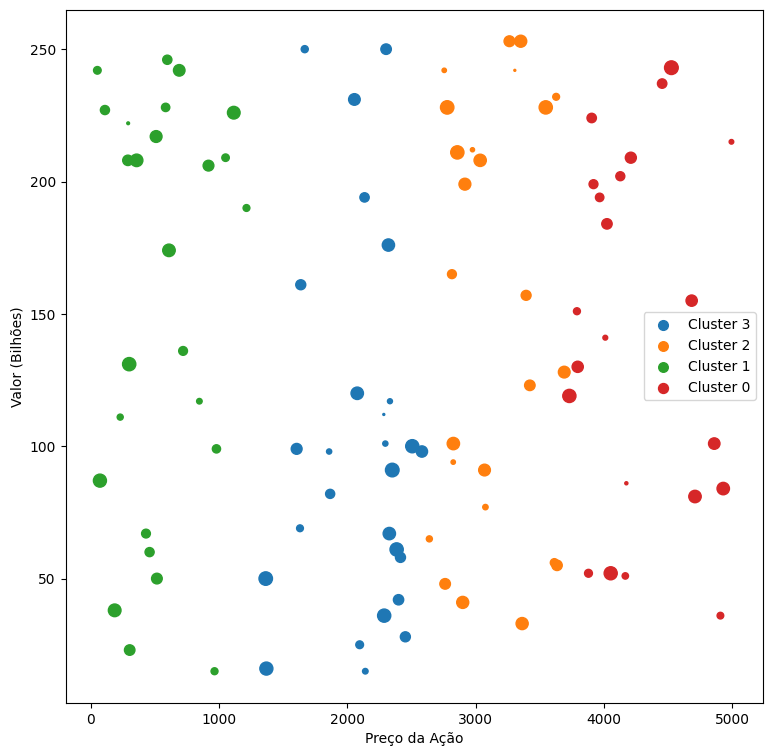

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.045455         0.227273  
1    

In [195]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(9,9))

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    plt.scatter(cluster_dados['valor de mercado R$ -(Bilhões)'], cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


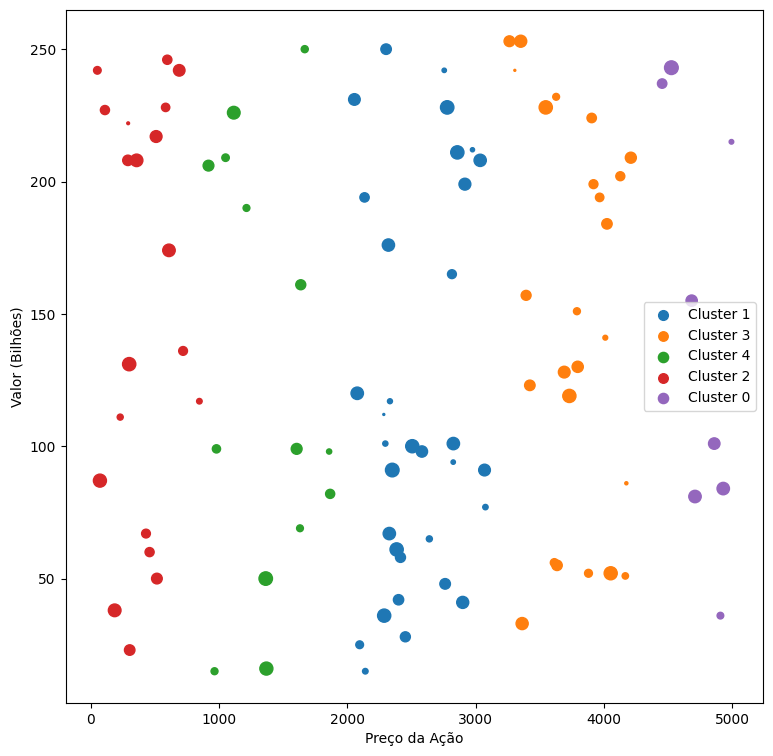

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.125000           0.000000          0.125000   
1               0.181818           0.090909          0.181818   
2               0.050000           0.300000          0.300000   
3               0.040000           0.160000          0.240000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [196]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(9,9))

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    plt.scatter(cluster_dados['valor de mercado R$ -(Bilhões)'], cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


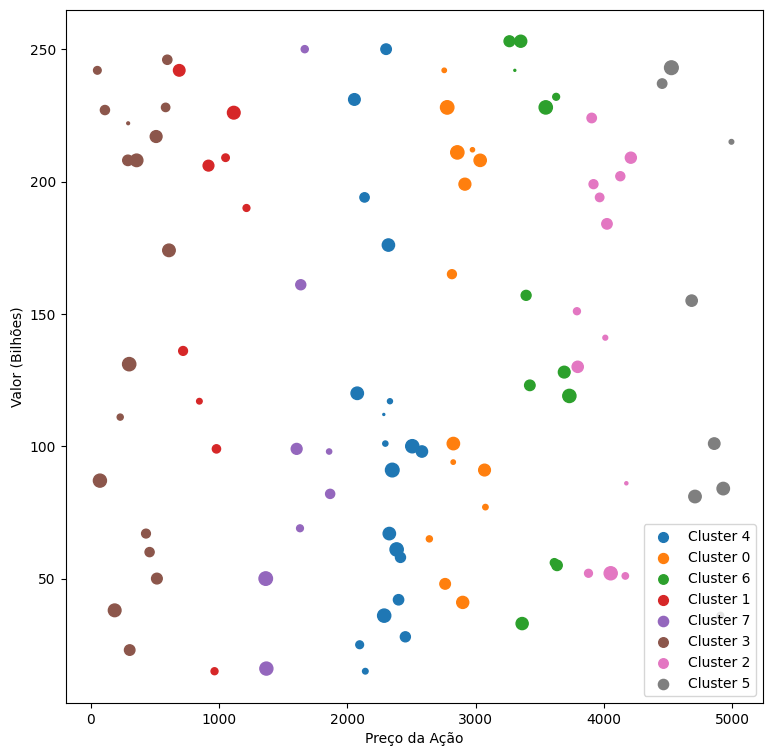

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           141.571429   51.571429                     2873.357143   
1           160.000000   42.333333                      944.444444   
2           144.230769   41.076923                     4000.923077   
3           149.352941   54.529412                      347.235294   
4           101.157895   56.684211                     2301.894737   
5           144.000000   58.875000                     4757.250000   
6           156.583333   57.250000                     3494.666667   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.285714           0.071429          0.214286   
1               0.000000           0.222222          0.444444   
2               0.000000           0.15

In [197]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(9,9))

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    plt.scatter(cluster_dados['valor de mercado R$ -(Bilhões)'], cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], label=f'Cluster {cluster}')

plt.xlabel('Preço da Ação')
plt.ylabel('Valor (Bilhões)')
plt.title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


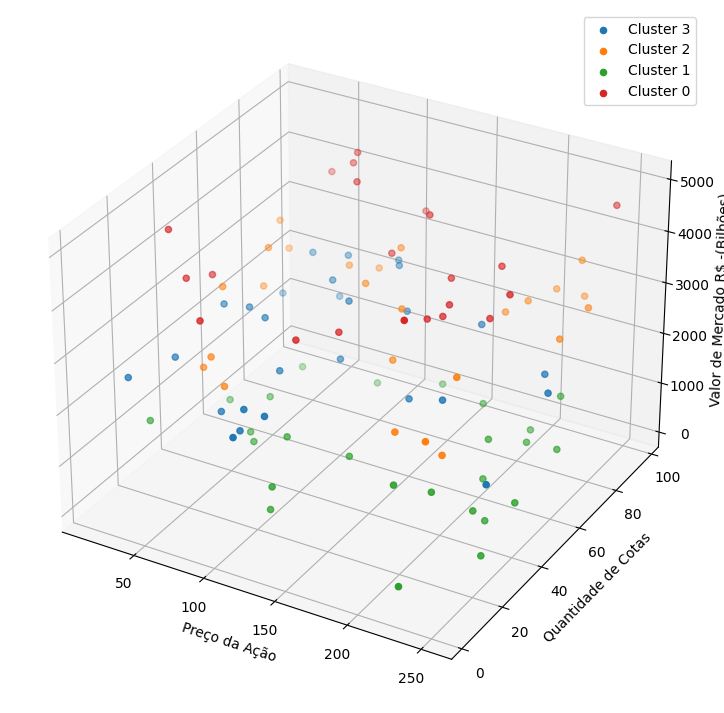

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.045455         0.227273  
1    

In [198]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


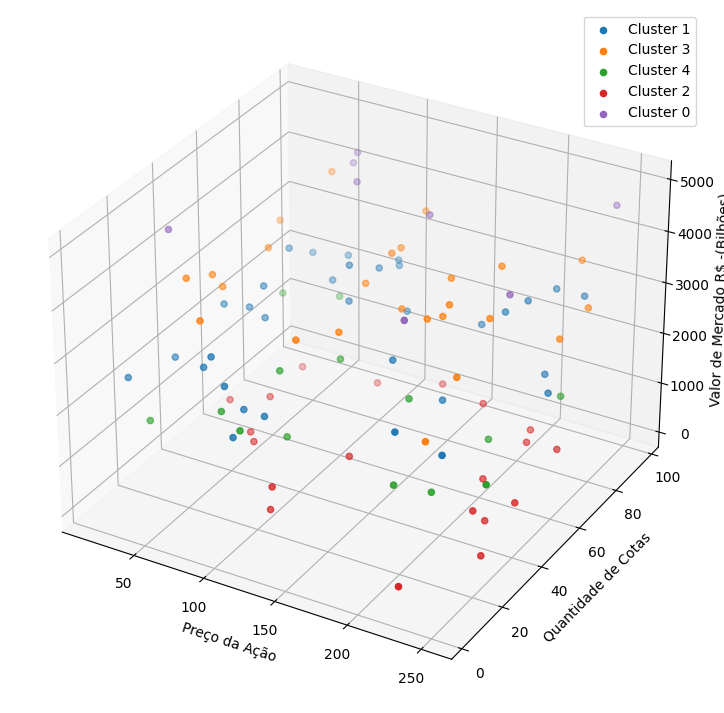

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.125000           0.000000          0.125000   
1               0.181818           0.090909          0.181818   
2               0.050000           0.300000          0.300000   
3               0.040000           0.160000          0.240000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [199]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


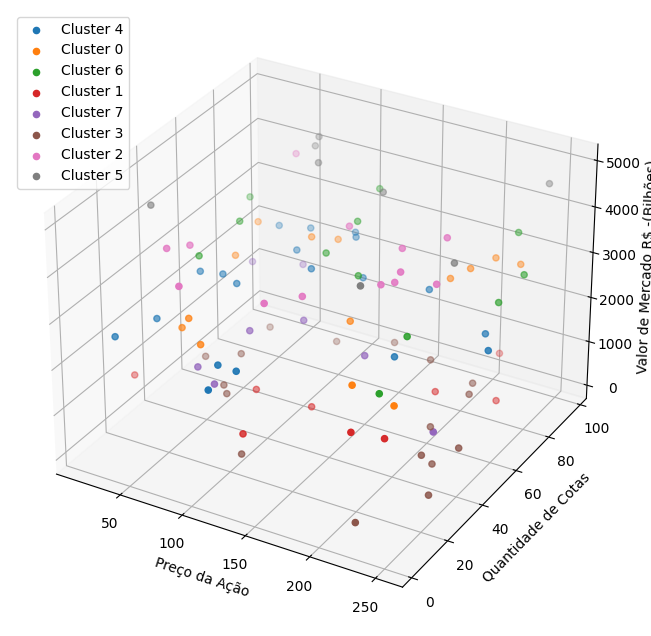

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           141.571429   51.571429                     2873.357143   
1           160.000000   42.333333                      944.444444   
2           144.230769   41.076923                     4000.923077   
3           149.352941   54.529412                      347.235294   
4           101.157895   56.684211                     2301.894737   
5           144.000000   58.875000                     4757.250000   
6           156.583333   57.250000                     3494.666667   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.285714           0.071429          0.214286   
1               0.000000           0.222222          0.444444   
2               0.000000           0.15

In [201]:
features = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df['Cluster'].unique():
    cluster_dados = df[df['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado R$ -(Bilhões)')
ax.set_title(f'')

plt.legend()
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

In [202]:
dados

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [203]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [204]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   preço ação R$                   100 non-null    int64
 1   qtde cotas                      100 non-null    int64
 2   valor de mercado R$ -(Bilhões)  100 non-null    int64
 3   nome ação_APPLE                 100 non-null    bool 
 4   nome ação_ELEKTRO               100 non-null    bool 
 5   nome ação_GOOGLE                100 non-null    bool 
 6   nome ação_PETR4                 100 non-null    bool 
 7   nome ação_SUZB3                 100 non-null    bool 
 8   nome ação_VALE3                 100 non-null    bool 
 9   Cluster                         100 non-null    int32
dtypes: bool(6), int32(1), int64(3)
memory usage: 3.4 KB
